<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Анализ-венчурных-и-ивестиционных-фондов" data-toc-modified-id="SQL-Анализ-венчурных-и-ивестиционных-фондов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQL Анализ венчурных и ивестиционных фондов</a></span><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Глосарий" data-toc-modified-id="Глосарий-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Глосарий</a></span></li><li><span><a href="#Знакомство-с-базой-данных" data-toc-modified-id="Знакомство-с-базой-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Знакомство с базой данных</a></span></li><li><span><a href="#Запросы-SQL" data-toc-modified-id="Запросы-SQL-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Запросы SQL</a></span></li></ul></li></ul></div>

# SQL Анализ венчурных и ивестиционных фондов

## Введение

В этом проекте я буду работать с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете [Startup Investments](https://www.kaggle.com/justinas/startup-investments), опубликованном на популярной платформе для соревнований по исследованию данных Kaggle. Запросы будут отсортироаны по возрастанию сложности.

## Глосарий

_Венчурные фонды_ — это финансовые организации, которые могут позволить себе высокий риск и инвестировать в компании с инновационной бизнес-идеей или разработанной новой технологией, то есть в _стартапы_. Цель венчурных фондов — в будущем получить значительную прибыль, которая в разы превысит размер их трат на инвестиции в компанию. Если стартап подорожает, венчурный фонд может получить долю в компании или фиксированный процент от её выручки.

Чтобы процесс финансирования стал менее рискованным, его делят на стадии — _раунды_. Тот или иной раунд зависит от того, какого уровня развития достигла компания.

Первые этапы — `предпосевной` и `посевной раунды`. Предпосевной раунд предполагает, что компания как таковая ещё не создана и находится в стадии замысла. Следующий — посевной — раунд знаменует рост проекта: создатели компании разрабатывают бизнес-модель и привлекают инвесторов.

Если компании требуется ментор или наставник — она привлекает бизнес-ангела. Бизнес-ангелы — инвесторы, которые помимо финансовой поддержки предлагают экспертную помощь. Такой раунд называют _ангельским_.

Когда стартап становится компанией с проверенной бизнес-моделью и начинает зарабатывать самостоятельно, предложений инвесторов становится больше. Это раунд A, а за ним следуют и другие: B, C, D — на этих этапах компания активно развивается и готовится к `IPO`.

Иногда выделяют венчурный раунд — финансирование, которое могло поступить от венчурного фонда на любом этапе: начальном или более позднем.


## Знакомство с базой данных

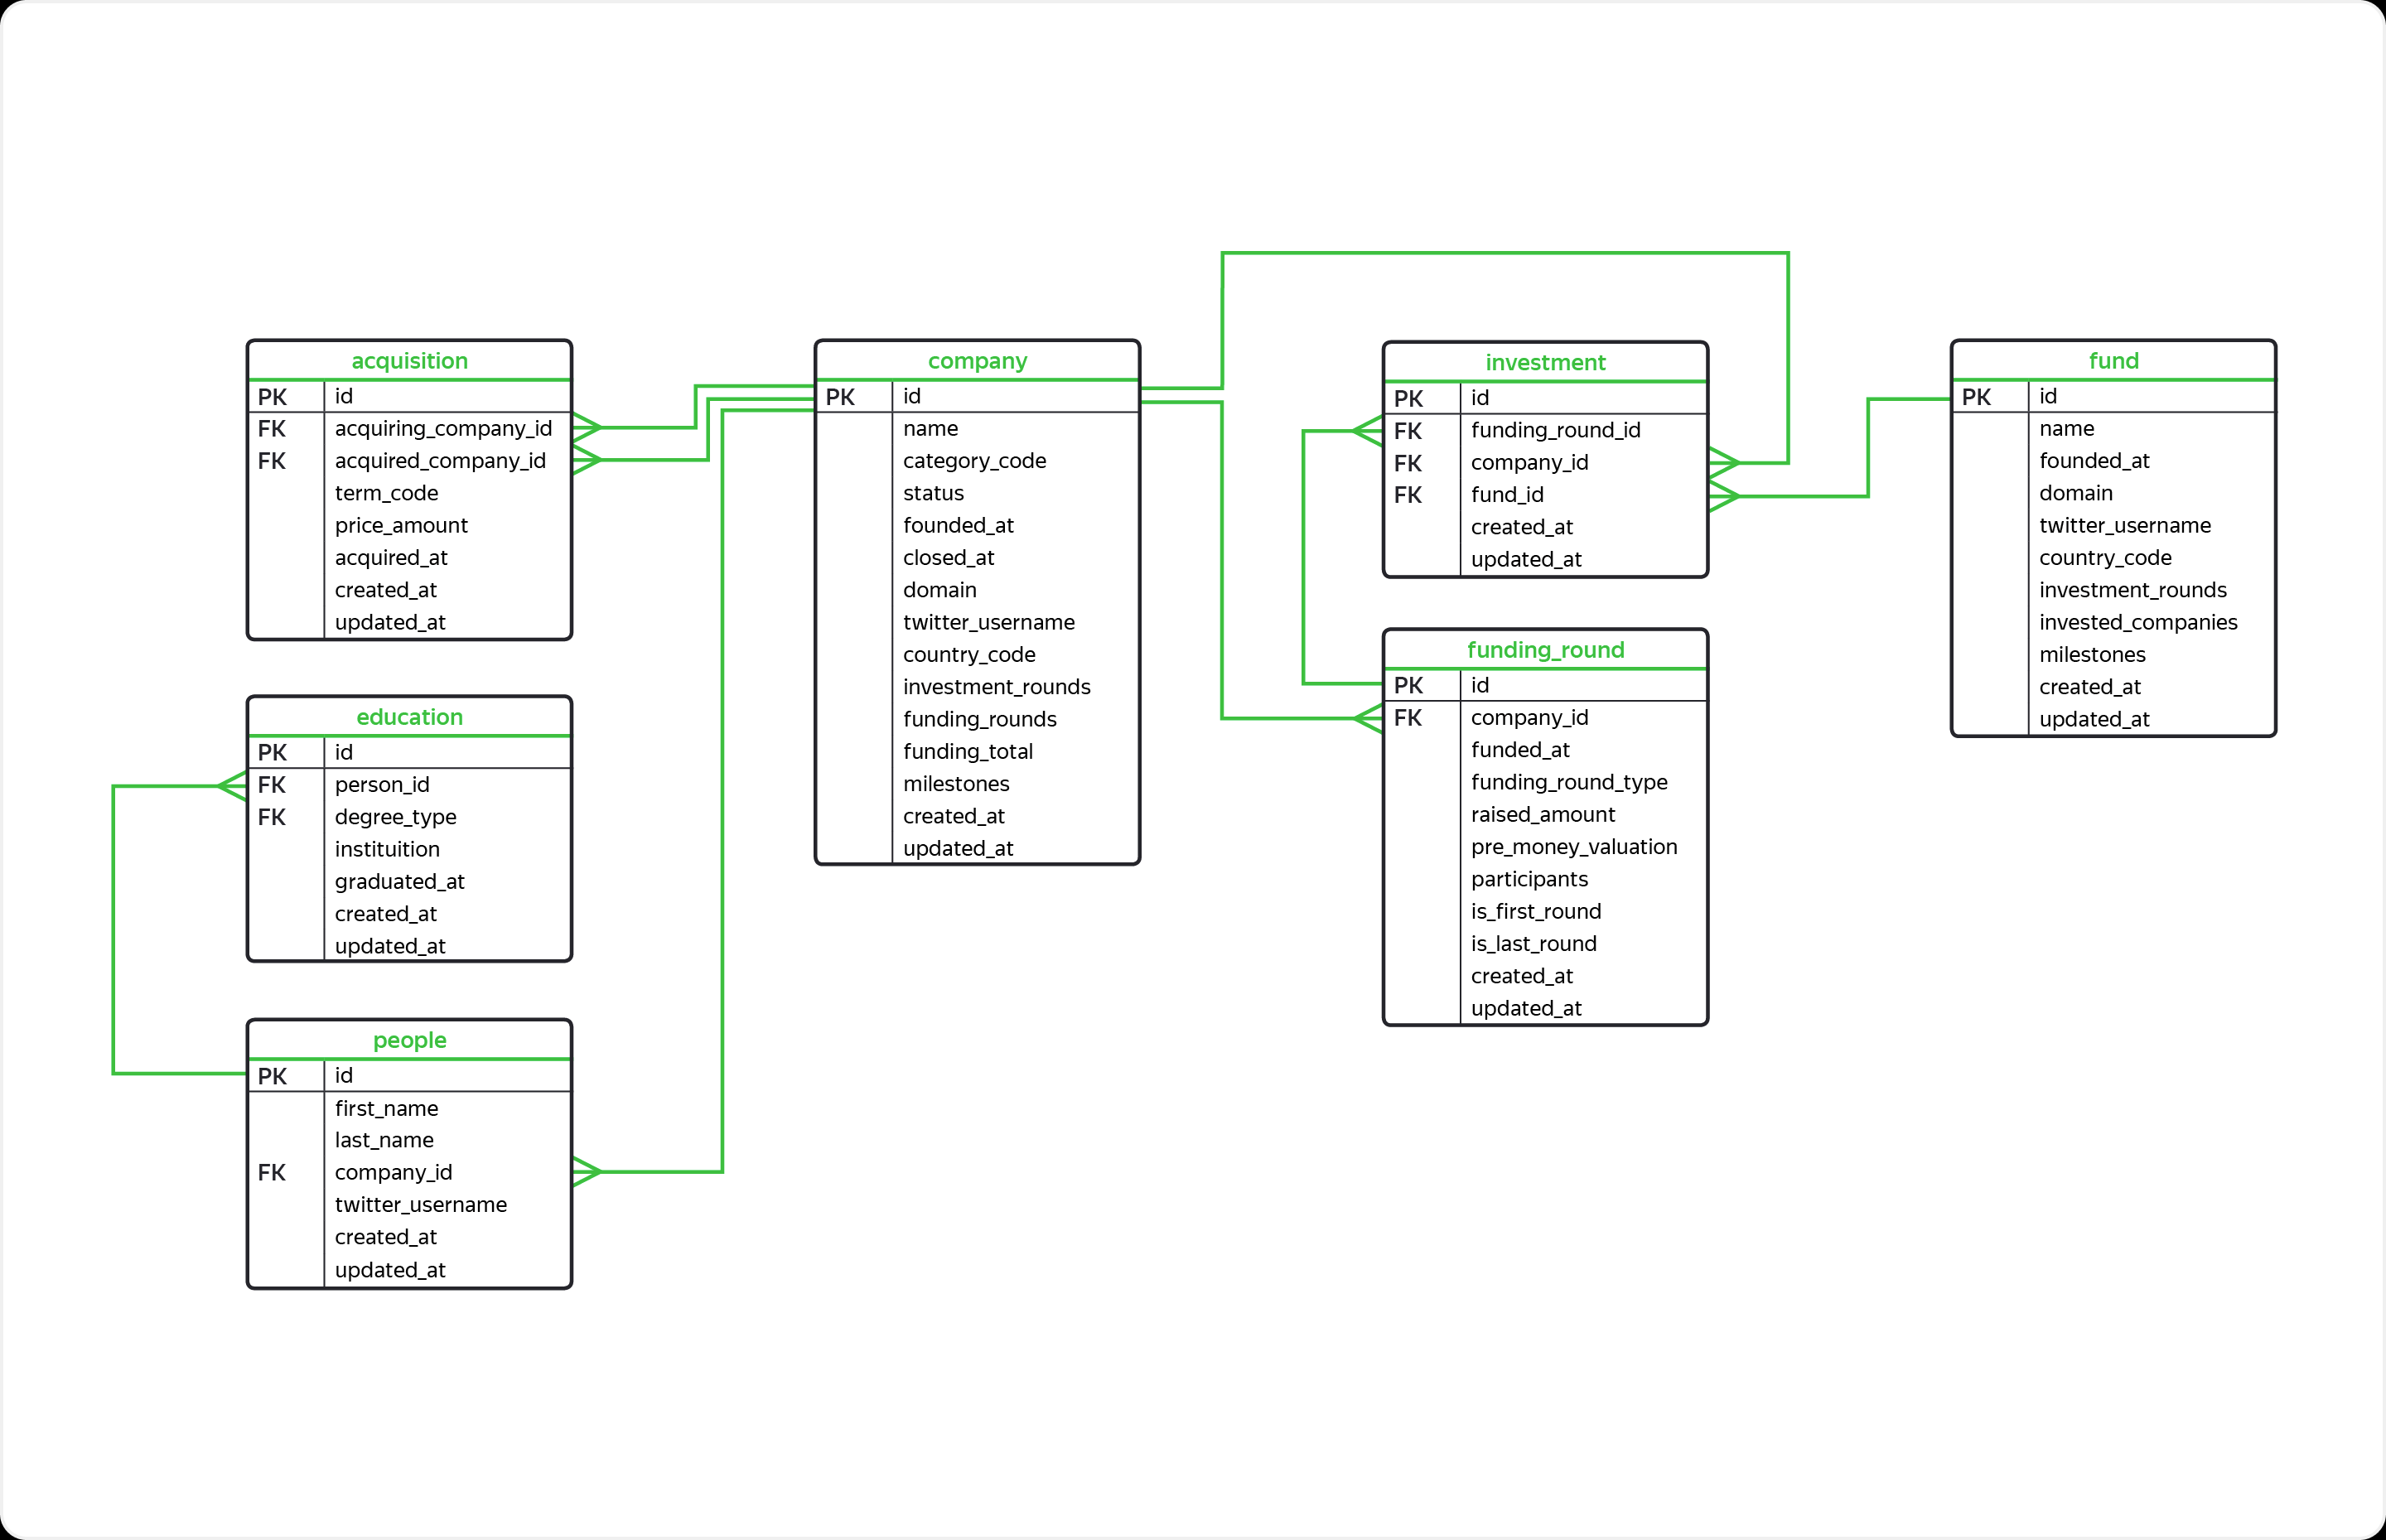

**`acquisition`**

Содержит информацию о покупках одних компаний другими.

Таблица включает такие поля:
* первичный ключ `id` — идентификатор или уникальный номер покупки;
* внешний ключ `acquiring_company_id` — ссылается на таблицу `company` — идентификатор компании-покупателя, то есть той, что покупает другую компанию;
* внешний ключ `acquired_company_id` — ссылается на таблицу `company` — идентификатор компании, которую покупают;
* `term_code` — способ оплаты сделки:
  * `cash` — наличными;
  * `stock` — акциями компании;
  * `cash_and_stock` — смешанный тип оплаты: наличные и акции.
* `price_amount` — сумма покупки в долларах;
* `acquired_at` — дата совершения сделки;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`company`**

Содержит информацию о компаниях-стартапах.
* первичный ключ `id` — идентификатор, или уникальный номер компании;
* `name` — название компании;
* `category_code` — категория деятельности компании, например:
  * `news` — специализируется на работе с новостями;
  * `social` — специализируется на социальной работе.
* `status` — статус компании:
  * `acquired` — приобретена;
  * `operating` — действует;
  * `ipo` — вышла на IPO;
  * `closed` — перестала существовать.
* `founded_at` — дата основания компании;
* `closed_at` — дата закрытия компании, которую указывают в том случае, если компании больше не существует;
* `domain` — домен сайта компании;
* `twitter_username` — название профиля компании в твиттере;
* `country_code` — код страны, например, `USA` для США, `GBR` для Великобритании;
* `investment_rounds` — число раундов, в которых компания участвовала как инвестор;
* `funding_rounds` — число раундов, в которых компания привлекала инвестиции;
* `funding_total` — сумма привлечённых инвестиций в долларах;
* `milestones` — количество важных этапов в истории компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`education`**

Хранит информацию об уровне образования сотрудников компаний.
* первичный ключ `id` — уникальный номер записи с информацией об образовании;
* внешний ключ `person_id` — ссылается на таблицу `people` — идентификатор человека, информация о котором представлена в записи;
* `degree_type` — учебная степень, например:
  * `BA` — Bachelor of Arts — бакалавр гуманитарных наук;
  * `MS` — Master of Science — магистр естественных наук.
* `instituition` — учебное заведение, название университета;
* `graduated_at` — дата завершения обучения, выпуска;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`fund`**

Хранит информацию о венчурных фондах.
* первичный ключ `id` — уникальный номер венчурного фонда;
* `name` — название венчурного фонда;
* `founded_at` — дата основания фонда;
* `domain` — домен сайта фонда;
* `twitter_username` — профиль фонда в твиттере;
* `country_code` — код страны фонда;
* `investment_rounds` — число инвестиционных раундов, в которых фонд принимал участие;
* `invested_companies` — число компаний, в которые инвестировал фонд;
* `milestones` — количество важных этапов в истории фонда;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`funding_round`**

Содержит информацию о раундах инвестиций.
* первичный ключ `id` — уникальный номер инвестиционного раунда;
* внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании, участвовавшей в инвестиционном раунде;
* `funded_at` — дата проведения раунда;
* `funding_round_type` — тип инвестиционного раунда, например:
  * `venture` — венчурный раунд;
  * `angel` — ангельский раунд;
  * `series_a` — раунд А.
* `raised_amount` — сумма инвестиций, которую привлекла компания в этом раунде в долларах;
* `pre_money_valuation` — предварительная, проведённая до инвестиций оценка стоимости компании в долларах;
* `participants` — количество участников инвестиционного раунда;
* `is_first_round` — является ли этот раунд первым для компании;
* `is_last_round` — является ли этот раунд последним для компании;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`investment`**

Содержит информацию об инвестициях венчурных фондов в компании-стартапы.
* первичный ключ `id` — уникальный номер инвестиции;
* внешний ключ `funding_round_id` — ссылается на таблицу `funding_round` — уникальный номер раунда инвестиции;
* внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании-стартапа, в которую инвестируют;
* внешний ключ `fund_id` — ссылается на таблицу `fund` — уникальный номер фонда, инвестирующего в компанию-стартап;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

**`people`**

Содержит информацию о сотрудниках компаний-стартапов.
* первичный ключ `id` — уникальный номер сотрудника;
* `first_name` — имя сотрудника;
* `last_name` — фамилия сотрудника;
* внешний ключ `company_id` — ссылается на таблицу `company` — уникальный номер компании-стартапа;
* `twitter_username` — профиль сотрудника в твиттере;
* `created_at` — дата и время создания записи в таблице;
* `updated_at` — дата и время обновления записи в таблице.

## Запросы SQL

---

**1. Посчитаю, сколько компаний закрылось.**
```SQL
SELECT COUNT(status)
FROM company
WHERE status = 'closed'
```

**2. Отображу количество привлечённых средств для новостных компаний США. Использую данные из таблицы `company`. Отсортирую таблицу по убыванию значений в поле `funding_total`.**
```SQL
SELECT SUM(funding_total)
FROM company
WHERE category_code = 'news'
  AND country_code ='USA'
GROUP BY name
ORDER BY SUM(funding_total) DESC
```

**3. Найду общую сумму сделок по покупке одних компаний другими в долларах. Отберу сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.**
```SQL
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
  AND CAST(acquired_at AS date) BETWEEN '2011-01-01' AND '2013-12-31'  
```

**4. Отображу имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на `'Silver'`.**
```SQL
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'
```

**5. Выведу на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку `'money'`, а фамилия начинается на `'K'`.**
```SQL
SELECT  *
FROM people
WHERE twitter_username LIKE '%money%'
  AND last_name LIKE 'K%'
```

**6. Для каждой страны отображу общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, определю по коду страны. Отсортирую данные по убыванию суммы.**
```SQL
SELECT SUM(funding_total),
       country_code
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC
```

**7. Составлю таблицу, в которую войдут дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.**

   Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.
```SQL
SELECT funded_at,
       MIN(raised_amount),
       MAX(raised_amount)
FROM funding_round
GROUP BY funded_at 
HAVING MIN(raised_amount) != 0 AND MIN(raised_amount) != MAX(raised_amount)
```

**8. Создам поле с категориями:**
   * Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
   * Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `iddle_activity`.
   * Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию `low_activity`.

**Отображу все поля таблицы fund и новое поле с категориями.**
```SQL
SELECT *,
      CASE
          WHEN invested_companies >= 100 THEN 'high_activity'
          WHEN invested_companies < 100 AND invested_companies >= 20 THEN 'middle_activity'
          WHEN invested_companies < 20 THEN 'low_activity'
      END    
FROM fund
```

**9. Для каждой из категорий, назначенных в предыдущем запросе, посчитаю округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведу на экран категории и среднее число инвестиционных раундов. Отсортирую таблицу по возрастанию среднего.**
```SQL
SELECT ROUND(AVG(investment_rounds)),
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund
GROUP BY activity
ORDER BY ROUND(AVG(investment_rounds))
```

**10. Выгружу таблицу с десятью самыми активно инвестирующими странами. Активность страны определю по среднему количеству компаний, в которые инвестируют фонды этой страны.**
    
    Для каждой страны посчитаю минимальное, максимальное и среднее число компаний, в которые инвестировали фонды, основанные с 2010 по 2012 год включительно.
    
    Исключу из таблицы страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Отсортирую таблицу по среднему количеству компаний от большего к меньшему.
    
    Для фильтрации диапазона по годам использую оператор `BETWEEN`.
```SQL
SELECT country_code,
       AVG(invested_companies),
       MIN(invested_companies),
       MAX(invested_companies)
FROM fund
WHERE EXTRACT('year' FROM founded_at) BETWEEN 2010 AND 2012
GROUP BY country_code
HAVING MIN(invested_companies) != 0
ORDER BY AVG(invested_companies) DESC
LIMIT 10
```

**11. Отображу имя и фамилию всех сотрудников стартапов. Добавлю поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.**
```SQL
SELECT p.first_name,
       p.last_name,
       e.instituition
FROM people AS p
LEFT OUTER JOIN education AS e ON p.id=e.person_id
```

**12. Для каждой компании найду количество учебных заведений, которые окончили её сотрудники. Выведу название компании и число уникальных названий учебных заведений. Составлю топ-5 компаний по количеству университетов.**
```SQL
SELECT c.name,
       COUNT(DISTINCT e.instituition) AS qt
FROM company AS c
JOIN people AS p ON c.id = p.company_id
JOIN education AS e ON e.person_id = p.id
GROUP BY c.name
ORDER BY qt DESC
LIMIT 5
```

**13. Составлю список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.**
```SQL
SELECT DISTINCT c.name
FROM company AS c
WHERE status = 'closed'
  AND c.id IN (SELECT company_id
               FROM funding_round
               WHERE is_first_round = 1 AND is_last_round = 1)
```

**14. Составлю список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем запросе.**
```SQL
  SELECT DISTINCT id
  FROM people
  WHERE company_id IN
      (SELECT DISTINCT id
       FROM company AS c
       WHERE status = 'closed'
       AND c.id IN 
          (SELECT company_id
           FROM funding_round
           WHERE is_first_round = 1 AND is_last_round = 1))
```

**15. Составлю таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущего запроса и учебным заведением, которое окончил сотрудник.**
```SQL
SELECT DISTINCT p.id, e.instituition
FROM people as p INNER JOIN education AS e ON p.id = e.person_id
WHERE company_id IN 
    (SELECT DISTINCT id
     FROM company AS c
     WHERE status = 'closed'
       AND c.id IN 
           (SELECT company_id
            FROM funding_round
            WHERE is_first_round = 1 AND is_last_round = 1))
```

**16. Посчитаю количество учебных заведений для каждого сотрудника из предыдущего запроса.**
```SQL
SELECT DISTINCT p.id, COUNT(e.instituition)
FROM people as p INNER JOIN education AS e ON p.id = e.person_id
WHERE company_id IN (SELECT DISTINCT id
                      FROM company AS c
                      WHERE status = 'closed'
                      AND c.id IN (SELECT company_id
                                   FROM funding_round
                                   WHERE is_first_round = 1 AND is_last_round = 1))
GROUP BY p.id   
```

**17. Дополню предыдущий запрос и выведу среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Выведу только одну запись, без группировки.**
```SQL
SELECT AVG(enough.count)
FROM (
SELECT DISTINCT p.id, COUNT(e.instituition)
FROM people as p INNER JOIN education AS e ON p.id = e.person_id
WHERE company_id IN (SELECT DISTINCT id
                      FROM company AS c
                      WHERE status = 'closed'
                      AND c.id IN (SELECT company_id
                                   FROM funding_round
                                   WHERE is_first_round = 1 AND is_last_round = 1))
GROUP BY p.id) AS enough
```

**18. Напишу похожий запрос: выведу среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники компании Facebook.**
```SQL
SELECT AVG(enough.count)
FROM (SELECT DISTINCT p.id, COUNT(e.instituition)
FROM people as p INNER JOIN education AS e ON p.id = e.person_id
WHERE company_id IN (SELECT DISTINCT id
                      FROM company AS c
                      WHERE c.name = 'Facebook'
                      )
GROUP BY p.id) AS enough
```

**19. Составлю таблицу из полей:
    * `name_of_fund` — название фонда;
    * `name_of_company` — название компании;
    * `amount` — сумма инвестиций, которую привлекла компания в раунде.
    В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.**
```SQL
SELECT f.name AS name_fund,
       c.name AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS i
JOIN company AS c ON i.company_id=c.id
JOIN fund AS f ON i.fund_id=f.id
JOIN funding_round AS fr ON i.funding_round_id=fr.id
WHERE c.milestones > 6 AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2012 AND 2013
```

**20. Выгружу таблицу, в которой будут такие поля:**

* название компании-покупателя;
* сумма сделки;
* название компании, которую купили;
* сумма инвестиций, вложенных в купленную компанию;
* доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до         ближайшего целого числа.

**Не учитывая те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключу такую           компанию из таблицы.
  Отсортирую таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в алфавитном порядке.           Ограничу таблицу первыми десятью записями.**
```SQL
SELECT c.name,
       ac.price_amount,
       co.name,
       co.funding_total,
       ROUND(ac.price_amount / co.funding_total)
FROM acquisition AS ac
JOIN company AS c ON ac.acquiring_company_id=c.id
JOIN company AS co ON ac.acquired_company_id =co.id
WHERE ac.price_amount != 0 AND co.funding_total != 0
ORDER BY ac.price_amount DESC,
         co.name
LIMIT 10  
```

**21. Выгружу таблицу, в которую войдут названия компаний из категории `social`, получившие финансирование с 2010 по 2013 год включительно. Выведу также номер месяца, в котором проходил раунд финансирования.**
```SQL
SELECT c.name,
       EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE))
FROM company AS c
LEFT OUTER JOIN funding_round AS fr ON c.id=fr.company_id
WHERE c.category_code = 'social'
  AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
```

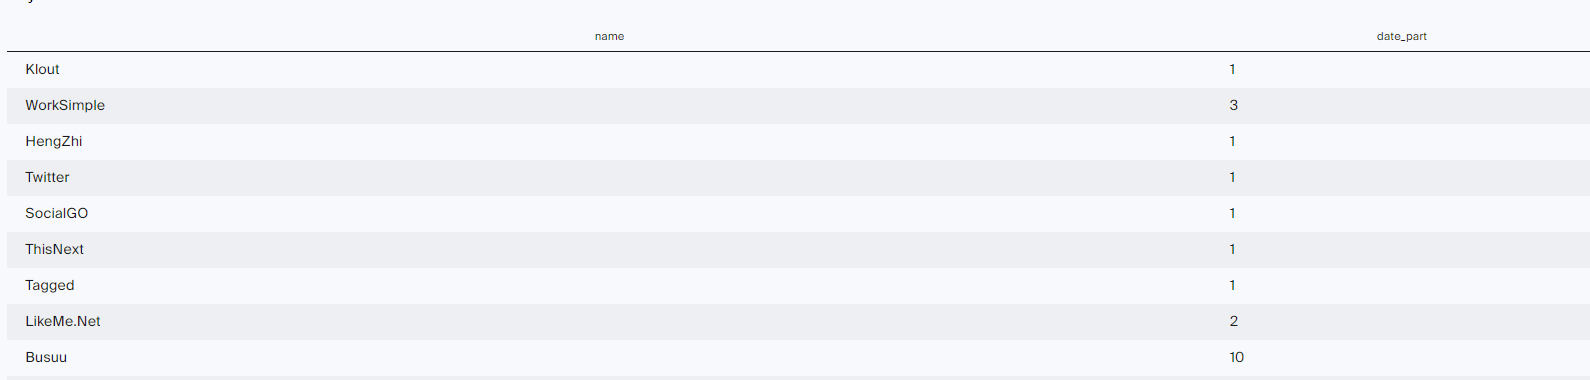

**22. Отберу данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппирую данные по номеру месяца и получу таблицу, в которой будут поля:**
   * номер месяца, в котором проходили раунды;
   * количество уникальных названий фондов из США, которые инвестировали в этом месяце;
   * количество компаний, купленных за этот месяц;
   * общая сумма сделок по покупкам в этом месяце.
```SQL
WITH qwerty AS(
SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE)) as month,
       COUNT(DISTINCT f.name) count_of_fund
FROM funding_round AS fr
JOIN investment AS i ON fr.id=i.funding_round_id    
JOIN fund AS f ON i.fund_id=f.id
WHERE EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
  AND f.country_code = 'USA'  
GROUP BY month),
ytrewq AS (
SELECT EXTRACT(MONTH FROM CAST(acquired_at AS DATE)) AS month,
       COUNT(acquired_company_id) AS acq,
       SUM(price_amount) AS spa
FROM acquisition
WHERE EXTRACT(YEAR FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013    
GROUP BY month    
)
SELECT qwerty.month,
       qwerty.count_of_fund,
       ytrewq.acq,
       ytrewq.spa
FROM qwerty
```

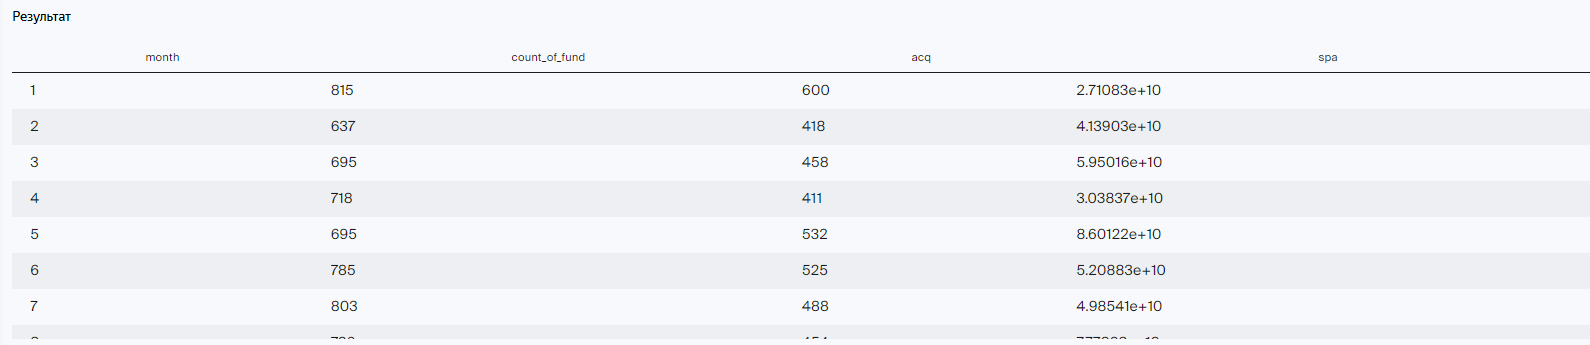

**23. Составлю сводную таблицу и выведу среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый будут в отдельном поле. Отсортирую таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.**
```SQL
WITH 
t1 AS (
    SELECT country_code,
           AVG(funding_total) AS avg_amount
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at) = '2011'
    GROUP BY country_code
    ),
t2 AS (
    SELECT country_code,
           AVG(funding_total) AS avg_amount
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at) = '2012'
    GROUP BY country_code
    ),
t3 AS (
    SELECT country_code,
           AVG(funding_total) AS avg_amount
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at) = '2013'
    GROUP BY country_code
    )
SELECT t1.country_code,t1.avg_amount,t2.avg_amount,t3.avg_amount
FROM t1 
JOIN t2 ON t1.country_code = t2.country_code
JOIN t3 ON t1.country_code = t3.country_code
ORDER BY t1.avg_amount DESC
```

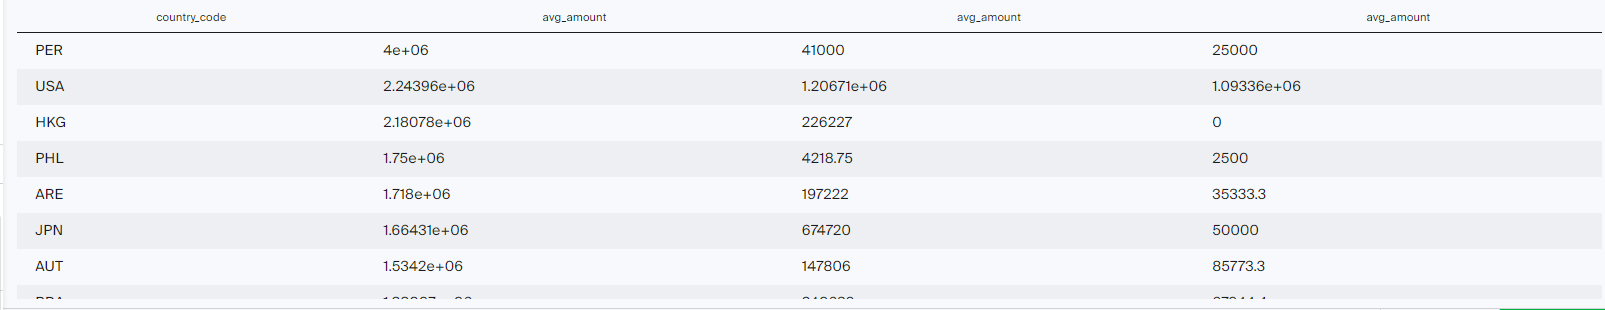